# Q1. Explain GET and POST methods.
## A1. **GET** and **POST** are two HTTP request methods used for different purposes when interacting with web servers. They are part of the HTTP protocol and serve distinct roles in web applications:

**GET Method:**
1. **Purpose:** The GET method is used to request data from a specified resource. It is primarily used for data retrieval and read-only operations.
2. **Data Transmission:** Data is appended to the URL as query parameters. These parameters are visible in the URL's query string.
3. **Idempotent:** GET requests are considered idempotent, meaning multiple identical requests should have the same effect as a single request. They do not change the server's state.
4. **Caching:** GET requests can be cached by web browsers and proxy servers because they are safe and idempotent.
5. **Security:** GET requests are generally considered less secure for sending sensitive data because the data is visible in the URL.

**Example of a GET Request:**





In [1]:
import requests

# URL of the resource you want to access
url = 'https://jsonplaceholder.typicode.com/posts/1'

# Send a GET request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.json()
    print("GET Request Response:")
    print(data)
else:
    print("GET request failed with status code:", response.status_code)


GET Request Response:
{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


**POST Method:**
1. **Purpose:** The POST method is used to submit data to be processed to a specified resource. It is commonly used for actions that change the server's state, such as creating, updating, or deleting data.
2. **Data Transmission:** Data is included in the request body, not in the URL. This makes POST requests more suitable for sending large or sensitive data.
3. **Not Idempotent:** POST requests are not idempotent, meaning multiple identical requests may have different effects on the server.
4. **Not Cached:** POST requests are typically not cached by web browsers or proxy servers because they can have side effects on the server.
5. **Security:** POST requests are more secure for sending sensitive data because the data is not visible in the URL.

**Example of a POST Request:**



In [2]:
import requests

# URL where you want to send the POST request
url = 'https://jsonplaceholder.typicode.com/posts'

# Data to be sent in the request body
data = {
    'title': 'Sample Post',
    'body': 'This is the content of the post.',
    'userId': 1
}

# Send a POST request
response = requests.post(url, json=data)

# Check if the request was successful (status code 201 for resource creation)
if response.status_code == 201:
    created_post = response.json()
    print("POST Request Response:")
    print(created_post)
else:
    print("POST request failed with status code:", response.status_code)


POST Request Response:
{'title': 'Sample Post', 'body': 'This is the content of the post.', 'userId': 1, 'id': 101}


**In summary:**

- **GET** is used for retrieving data and is safe, idempotent, and suitable for non-sensitive data.
- **POST** is used for submitting data to be processed, and it is not idempotent, making it suitable for actions that change server state and for sending sensitive data.

The choice between GET and POST depends on the specific use case and the nature of the data being transferred.

# Q2. Why is request used in Flask?
## A2.
In Flask, the `request` object is used to access and handle incoming HTTP requests made to your web application. It's a critical component of any web framework as it allows you to retrieve data sent by the client (e.g., browser) and make decisions and perform actions based on that data. Here are some of the key reasons why the `request` object is used in Flask:

1. **Accessing Client Data:** The `request` object allows you to access data from the client, including form data, query parameters, request headers, cookies, and the request method (e.g., GET, POST). This information is essential for processing user input and making dynamic responses.

2. **Handling Form Data:** When a user submits a web form, the data from that form is included in the request. The `request` object helps you access and process this data, making it easy to handle form submissions.

3. **Routing and Request Handling:** Flask routes are defined to respond to specific URLs and HTTP methods. The `request` object is often used within route functions to determine what action to take based on the incoming request, such as displaying a page, processing data, or returning JSON responses.

4. **Authentication and Authorization:** You can use the `request` object to check user authentication and authorization by inspecting cookies, session data, or request headers.

5. **File Uploads:** If your application allows file uploads, the `request` object is used to handle uploaded files and retrieve information about the uploaded files.

Here's a simple example of how you might use the `request` object in a Flask route:



In [5]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/process_data', methods=['POST'])
def process_data():
    if request.method == 'POST':
        data = request.form['input_data']
        # Process the data, e.g., save it to a database
        return f'Processed data: {data}'
    else:
        return 'Invalid request method'

if __name__ == '__main__':
    app.run(host="0.0.0.0")


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


# Q3. Why is redirect() used in Flask?
## A3.
In Flask, the `redirect()` function is used to perform HTTP redirects. A redirect is a response sent by the server to the client's web browser, instructing it to navigate to a different URL. The `redirect()` function is essential in web applications for several reasons:

1. **Changing URLs:** Redirects allow you to change the URL in the user's browser. This is often used to provide a more user-friendly or canonical URL for a resource. For example, you can use redirects to ensure that users are always directed to a preferred URL format (e.g., with or without trailing slashes).

2. **Handling Form Submissions:** After a user submits a form, it is a common practice to redirect them to another page, known as the "POST-redirect-GET" pattern. This helps prevent form resubmissions when the user refreshes the page, providing a better user experience.

3. **Changing Routes:** When handling different routes or endpoints in a web application, you may want to redirect the user to a different route based on certain conditions. For instance, after a successful login, you can redirect the user to their profile page.

4. **Status Codes:** Redirects are accompanied by HTTP status codes (e.g., 301 Moved Permanently, 302 Found, 303 See Other) that indicate the type of redirect being performed. This status code informs search engines and web browsers about the nature of the redirect, which can affect how they handle the new URL.

5. **SEO and Canonical URLs:** Redirects can be used to establish canonical URLs for content. For example, you can redirect all variations of a URL to a single, canonical URL to improve search engine optimization (SEO) and prevent duplicate content issues.



In [1]:
# an example of how to use `redirect()` in Flask:

from flask import Flask, redirect, url_for

app = Flask(__name__)

# Define a route
@app.route('/')
def home():
    # Redirect the user to another route
    return redirect(url_for('about'))

# Define another route
@app.route('/about')
def about():
    return 'This is the About page.'

if __name__ == '__main__':
    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


# Q4. What are templates in Flask? Why is the render_template() function used?
## A4.
In Flask, **templates** are a critical component of rendering HTML content dynamically in web applications. Templates are HTML files with placeholders for dynamic data that can be filled in with specific values when the web page is generated and served to the client. Templates allow you to separate the presentation (HTML structure) from the logic of your web application.

Here's why templates are important in Flask:

1. **Separation of Concerns:** Templates promote the separation of concerns by separating the HTML structure and presentation from the Python code that generates dynamic content. This makes your code cleaner and more maintainable.

2. **Dynamic Content:** Templates allow you to insert dynamic content into HTML pages. You can pass data from your Flask application to templates, and the templates can display this data dynamically.

3. **Code Reusability:** Templates can be reused across multiple routes or views in your application. This avoids duplicating HTML code and ensures consistency in the user interface.

4. **Maintainability:** Templates are easier to maintain because changes to the HTML structure can be made in one place (the template file) without affecting the logic of your application.

The `render_template()` function is used in Flask to render HTML templates. It takes the name of the template file (usually a .html file) as an argument and returns the rendered HTML content as a response to the client's request. Here's how it works:




In this example:

- We define a Flask route ('/') that renders the 'company_info.html' template.

- Inside the company_info function, we create a Python dictionary (`info`) that contains data we want to pass to the template.

- We use `render_template('company_info.html', **info)` to render the 'company_info.html' template and pass the 'info' dictionary to it.

- The 'company_info.html' template can use placeholders (e.g., `{{ info.company_name }}`, `{{ info.location }}`) to insert the values dynamically.

Here's a simplified example of 'company_info.html':

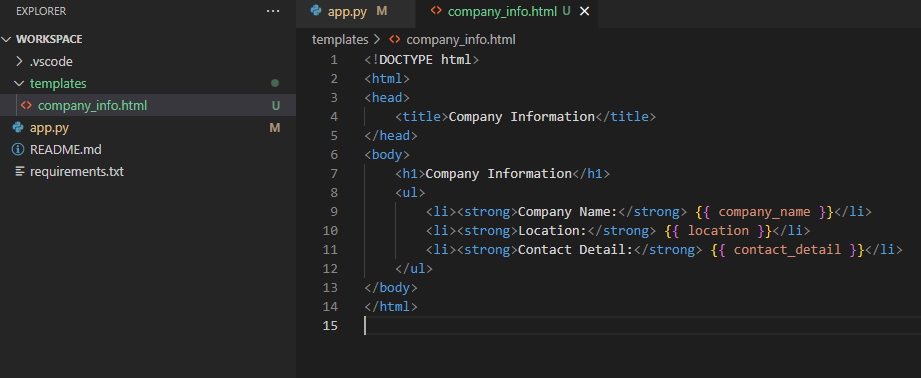

When a user visits the '/' route, Flask will render the 'company_info.html' template with the info provided, and the placeholders will be replaced with the actual data. The resulting HTML page will be sent as a response to the client's browser.

In summary, templates in Flask allow you to create dynamic web pages by separating the HTML structure from the logic of your application. The `render_template()` function is used to render these templates with dynamic data.

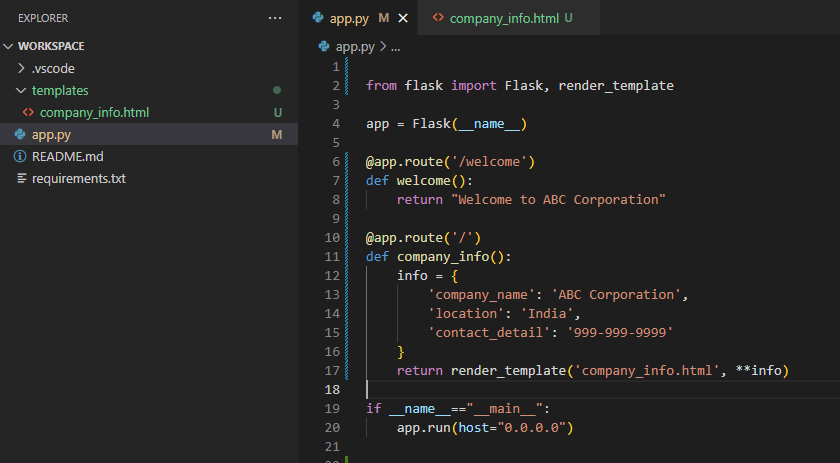



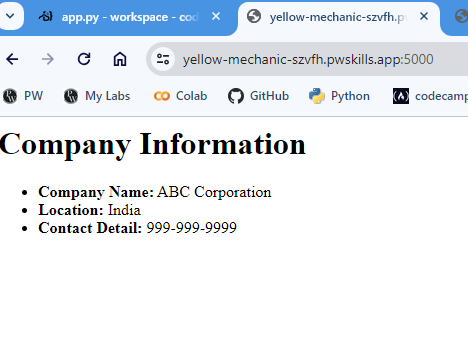

# Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.
## A5.

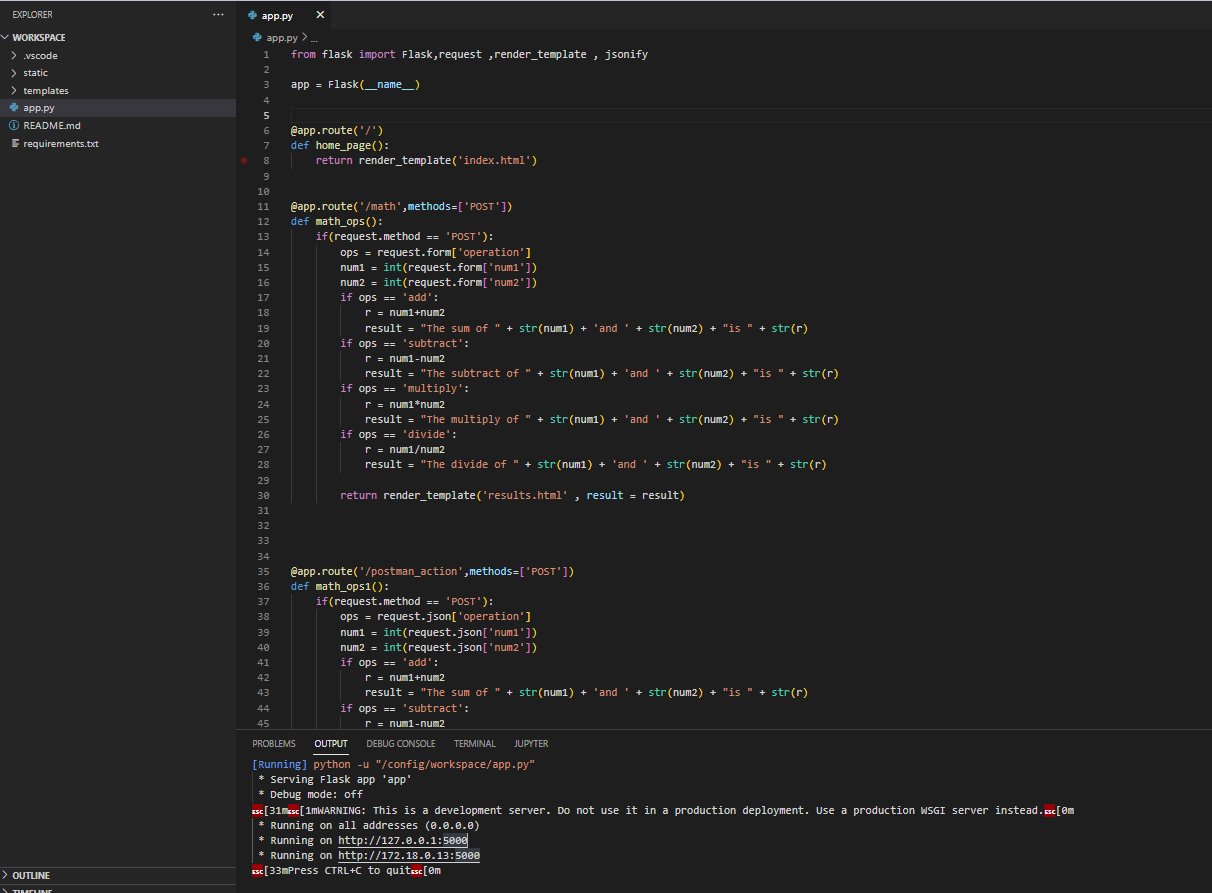

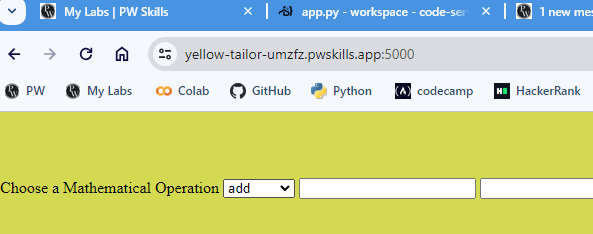

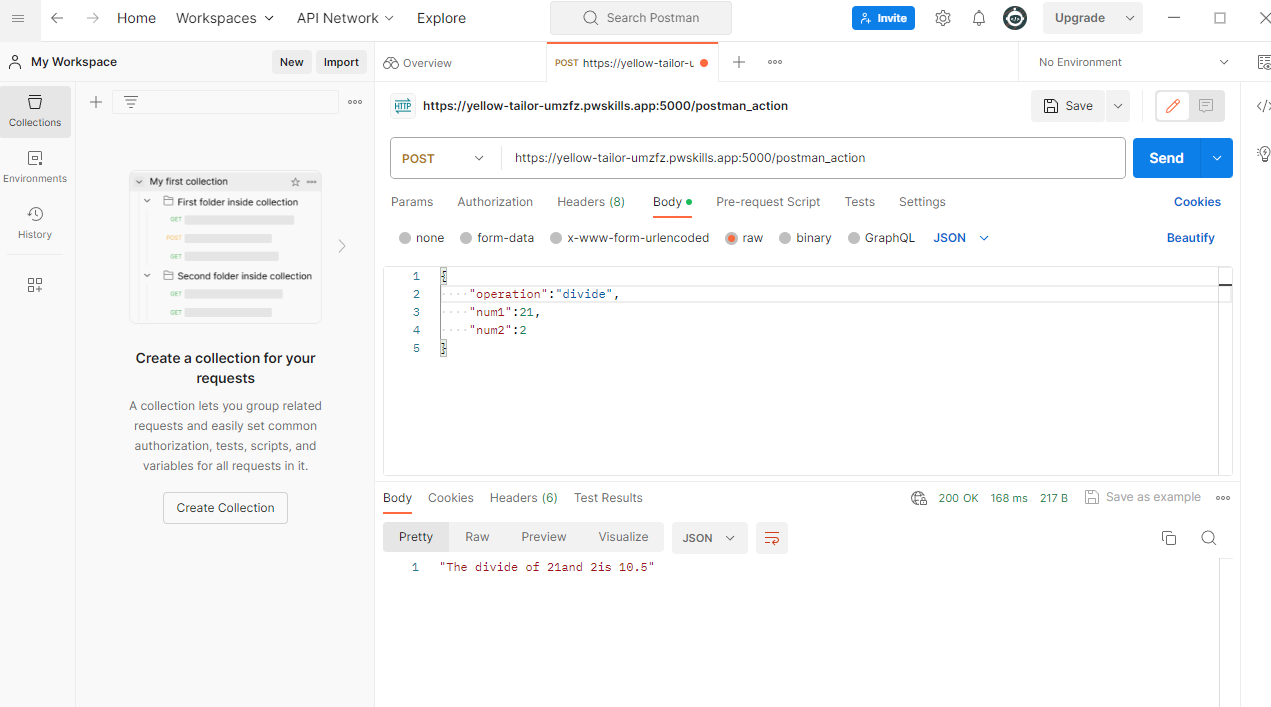